Notebook for creating the boxplots of all experiments for the unimodal case
Change the directory, the range_1, directory1, directory1_new according to your paths

In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn import metrics

In [2]:
seed = 49857
np.random.seed(seed)

In [3]:
directory = os.path.dirname(os.path.dirname(os.getcwd()))
directory

'/data/user/boiger_r/aerosol'

In [4]:
#range_1 = ['1','4']
range_1 = ['1','4','5','6_secondversion','7_secondversion','8_secondversion','9','10','11','12','13','14_secondversion','15_secondversion','16','17','18_secondversion','19','20_secondversion','21_secondversion','22','23','24_secondversion']


In [5]:
df_P11 = []
df_P12 = []
df_P11_rel = []
df_RMSE = []
df_Vtot = []
df_Rmedian = []
df_GSD = []
df_n = []
df_k_450 = []
df_k_532 = []
df_k_630 = []
df_AAE = []

In [6]:
def change_dvar(dvar_test,dvar_pred,number):
    testnr = 1
    if '24' in number:
        dvar_test['k_630nm'] = dvar_test['k_450nm']*(630/450)**(1-dvar_test['AAE'])
        dvar_pred_iv['k_630nm'] = dvar_pred_iv['k_450nm']*(630/450)**(1-dvar_pred_iv['AAE'])
    elif '23' in number:
        dvar_test['k_630nm'] = dvar_test['k_532']*(630/532)**(1-dvar_test['AAE'])
        dvar_pred_iv['k_630nm'] = dvar_pred_iv['k_532']*(630/532)**(1-dvar_pred_iv['AAE'])
    elif '22' in number:
        dvar_test['k_450nm'] = dvar_test['k_532']*(450/532)**(1-dvar_test['AAE'])
        dvar_pred_iv['k_450nm'] = dvar_pred_iv['k_532']*(450/532)**(1-dvar_pred_iv['AAE'])
    elif '21' in number:
        testnr = testnr+1
    elif '20' in number:
        testnr = testnr+1
    elif '19' in number:
        testnr = testnr+1
    elif '18' in number:
        dvar_test['k_630nm'] = dvar_test['k_450nm']*(630/450)**(1-dvar_test['AAE'])
        dvar_pred_iv['k_630nm'] = dvar_pred_iv['k_450nm']*(630/450)**(1-dvar_pred_iv['AAE'])        
    elif '17' in number:
        dvar_test['k_630nm'] = dvar_test['k_532']*(630/532)**(1-dvar_test['AAE'])
        dvar_pred_iv['k_630nm'] = dvar_pred_iv['k_532']*(630/532)**(1-dvar_pred_iv['AAE'])
    elif '16' in number:
        dvar_test['k_450nm'] = dvar_test['k_532']*(450/532)**(1-dvar_test['AAE'])
        dvar_pred_iv['k_450nm'] = dvar_pred_iv['k_532']*(450/532)**(1-dvar_pred_iv['AAE'])
    elif '15' in number:
        testnr = testnr+1
    elif '14' in number:
        testnr = testnr+1
    elif '13' in number:    
        testnr = testnr+1    
    elif '12' in number :
        dvar_test['k_450nm'] = dvar_test['k_532']*(450/532)**(1-dvar_test['AAE'])
        dvar_pred_iv['k_450nm'] = dvar_pred_iv['k_532']*(450/532)**(1-dvar_pred_iv['AAE'])
        dvar_test['k_630nm'] = dvar_test['k_532']*(630/532)**(1-dvar_test['AAE'])
        dvar_pred_iv['k_630nm'] = dvar_pred_iv['k_532']*(630/532)**(1-dvar_pred_iv['AAE'])
    elif '11' in number:
        dvar_test['k_450nm'] = dvar_test['k_532']*(450/532)**(1-dvar_test['AAE'])
        dvar_pred_iv['k_450nm'] = dvar_pred_iv['k_532']*(450/532)**(1-dvar_pred_iv['AAE'])
        dvar_test['k_630nm'] = dvar_test['k_532']*(630/532)**(1-dvar_test['AAE'])
        dvar_pred_iv['k_630nm'] = dvar_pred_iv['k_532']*(630/532)**(1-dvar_pred_iv['AAE'])
    elif '10' in number:
        dvar_test['k_630nm'] = dvar_test['k_532']*(630/532)**(1-dvar_test['AAE'])
        dvar_pred_iv['k_630nm'] = dvar_pred_iv['k_532']*(630/532)**(1-dvar_pred_iv['AAE'])
    elif '9' in number:
        dvar_test['k_450nm'] = dvar_test['k_532']*(450/532)**(1-dvar_test['AAE'])
        dvar_pred_iv['k_450nm'] = dvar_pred_iv['k_532']*(450/532)**(1-dvar_pred_iv['AAE'])
    elif '8' in number:
        dvar_test['k_630nm'] = dvar_test['k_450nm']*(630/450)**(1-dvar_test['AAE'])
        dvar_pred_iv['k_630nm'] = dvar_pred_iv['k_450nm']*(630/450)**(1-dvar_pred_iv['AAE'])
    elif '7' in number:
        testnr = testnr+1
    elif '6' in number:
        testnr = testnr+1
    elif '5' in number:
        testnr = testnr+1
    elif '4' in number:
        dvar_test['k_450nm'] = dvar_test['k_532']*(450/532)**(1-dvar_test['AAE'])
        dvar_pred_iv['k_450nm'] = dvar_pred_iv['k_532']*(450/532)**(1-dvar_pred_iv['AAE'])
        dvar_test['k_630nm'] = dvar_test['k_532']*(630/532)**(1-dvar_test['AAE'])
        dvar_pred_iv['k_630nm'] = dvar_pred_iv['k_532']*(630/532)**(1-dvar_pred_iv['AAE'])
    elif '1' in number:
        dvar_test['k_450nm'] = dvar_test['k_532']*(450/532)**(1-dvar_test['AAE'])
        dvar_pred_iv['k_450nm'] = dvar_pred_iv['k_532']*(450/532)**(1-dvar_pred_iv['AAE'])
        dvar_test['k_630nm'] = dvar_test['k_532']*(630/532)**(1-dvar_test['AAE'])
        dvar_pred_iv['k_630nm'] = dvar_pred_iv['k_532']*(630/532)**(1-dvar_pred_iv['AAE'])

    return dvar_test, dvar_pred_iv


In [8]:
for i in range_1:
    directory1 = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/'
    directory1 = directory1 + 'paper_results_gaussian_AAE/version'+str(i)
    pred_datafile = directory1 +'/model/pred.hdf5'
    number = directory1.split('/',)[-1]

    print(directory1)
    
    plot_dir = directory1 + '/plots/model'
    if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)
    model_dir = directory1 +'/model'
    configs = pd.read_csv(f'{model_dir}/configs.csv')
    configs.columns
    test_datafile = configs['config/datafile'][0]
    test_datafile = test_datafile.replace('training','test')
    dvar_test = pd.read_hdf(test_datafile,key = 'dvar')
    qoi_test = pd.read_hdf(test_datafile,key = 'qoi')
    dvar_test.reset_index(drop=True, inplace=True)
    qoi_test.reset_index(drop=True, inplace=True)
    
    
    qoi_columns = qoi_test.columns
    dvar_columns = dvar_test.columns
        
        
    qoi_pred_fw = pd.read_hdf(pred_datafile, 'fw')
    qoi_pred_fw = pd.DataFrame(data=qoi_pred_fw, columns=qoi_columns)
    dvar_pred_iv = pd.read_hdf(pred_datafile,'inv')
    dvar_pred_iv = pd.DataFrame(data=dvar_pred_iv, columns=dvar_columns)
    
    
    dvar_test, dvar_pred_iv = change_dvar(dvar_test,dvar_pred_iv,number)
    
    if i == '1':
        for col in dvar_test.columns:
            RMSE = metrics.mean_squared_error(dvar_test[col],dvar_pred_iv[col],squared = False)
            print(RMSE)
    
    qoi_columns = qoi_test.columns
    dvar_columns = dvar_test.columns
    P11 = []
    P12 = []
    for name in qoi_columns:
        if 'P11' in name:
            P11.append(name)
        if 'P12' in name:
            P12.append(name)

    abs_error_fw = np.abs( (qoi_test) - (qoi_pred_fw))
    abs_error_fw_P11 = abs_error_fw[P11].mean(axis = 1)
    abs_error_fw_P12 = abs_error_fw[P12].mean(axis = 1)
    abs_error_iv = np.abs(dvar_test-dvar_pred_iv)
    
        
    rel_error_fw = np.abs( (np.exp(qoi_test) - np.exp(qoi_pred_fw)))/np.abs(np.exp(qoi_test))*100
    rel_error_fw_P11 = rel_error_fw[P11].mean(axis = 1)
    
    df_P11.append(abs_error_fw_P11)
    df_P12.append(abs_error_fw_P12)
    df_P11_rel.append(rel_error_fw_P11)
    df_Vtot.append(abs_error_iv['V_tot'])
    df_Rmedian.append(abs_error_iv['R_median'])
    df_GSD.append(abs_error_iv['GSD'])
    df_n.append(abs_error_iv['n'])

    if 'AAE' in abs_error_iv.columns:
        df_AAE.append(abs_error_iv['AAE'])
    if 'k_450nm' in abs_error_iv.columns:
        df_k_450.append(abs_error_iv['k_450nm'])
    if 'k_532' in abs_error_iv.columns:        
        df_k_532.append(abs_error_iv['k_532'])
    if 'k_630nm' in abs_error_iv.columns:
        df_k_630.append(abs_error_iv['k_630nm'])
    

/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version1
29.92913228512785
0.008978694895836217
0.002364386999613714
0.0017489864942819384
0.0012444094375057572
0.20523478543822798
0.001894540625935104
0.0011597850038632563
/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version4
/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version5
/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version6_secondversion
/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version7_secondversion
/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version8_secondversion
/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version9
/data/project/general/aerosolretriev/aeros

In [9]:
rel_error_fw

P12_0.450_5  P12_0.450_6  P12_0.450_7  P12_0.450_8  P12_0.450_9  \
0         0.021415     0.023704     0.004948     0.066580     0.011026   
1         0.024863     0.044653     0.036184     0.044443     0.080883   
2         0.053846     0.034811     0.185107     0.190072     0.018369   
3         0.017045     0.013582     0.041258     0.009014     0.068917   
4         0.010984     0.015809     0.005365     0.019569     0.036115   
...            ...          ...          ...          ...          ...   
19995     0.007074     0.020676     0.016491     0.051340     0.016312   
19996     0.018019     0.022643     0.006138     0.077551     0.013540   
19997     0.013011     0.002148     0.022541     0.000990     0.047573   
19998     0.009179     0.015453     0.038303     0.062957     0.036943   
19999     0.005463     0.024471     0.018047     0.022010     0.098972   

       P12_0.450_10  P12_0.450_11  P12_0.450_12  P12_0.450_13  P12_0.450_14  \
0          0.019346      0.017586      0.150114      0.079406      0.107631   
1          0.235178      0.218224      0.217119      0.359552      0.092011   
2          0.030265      0.019397      0.046867      0.319119      0.111470   
3          0.009191      0.045412      0.084691      0.153000      0.159199   
4          0.033095      0.000625      0.013410      0.062511      0.000855   
...             ...           ...           ...           ...           ...   
19995      0.011973      0.094162      0.213507      0.101011      0.083555   
19996      0.061926      0.166233      0.258431      0.183273      0.032481   
19997      0.022940      0.011533      0.091410      0.132374      0.045025   
19998      0.033590      0.053765      0.013630      0.069251      0.011964   
19999      0.034183      0.004573      0.192526      0.047322      0.093548   

       ...  P12_0.630_166  P12_0.630_167  P12_0.630_168  P12_0.630_169  \
0      ...       0.080124       0.991625       1.630883       0.118652   
1      ...       0.943072       1.465238       0.530899       0.573201   
2      ...       0.484613       0.358561       0.750779       0.068815   
3      ...       0.423775       0.108827       0.448611       0.529029   
4      ...       0.441191       0.370197       1.048165       1.190305   
...    ...            ...            ...            ...            ...   
19995  ...       1.766322       1.421706       1.934311       1.009402   
19996  ...       1.780861       2.159761       0.820079       1.851641   
19997  ...       0.045784       0.532281       0.125053       0.155616   
19998  ...       0.249182       1.697403       0.151626       0.144541   
19999  ...       0.455399       0.380180       0.473354       0.097147   

       P12_0.630_170  P12_0.630_171  P12_0.630_172  P12_0.630_173  \
0           0.063888       0.179020       0.816854       0.274984   
1           0.471132       0.189807       0.567688       0.073514   
2           0.315920       0.207571       0.332155       0.205730   
3           0.787646       0.471039       0.586751       0.756715   
4           1.271527       1.072841       0.251685       0.422193   
...              ...            ...            ...            ...   
19995       0.416663       0.190057       0.111816       0.240207   
19996       1.926458       1.112309       1.037160       0.150040   
19997       0.017695       0.005438       0.212863       0.167836   
19998       0.092384       1.509961       1.277496       0.103227   
19999       0.936368       0.322995       0.044483       0.209923   

       P12_0.630_174  P12_0.630_175  
0           0.120252       0.315132  
1           0.777610       0.323865  
2           0.371538       0.579618  
3           0.237331       0.693228  
4           0.292438       0.490526  
...              ...            ...  
19995       0.340965       0.716062  
19996       0.539124       0.549268  
19997       0.152349       0.066111  
19998       0.813039       0.633094  
19999       0.306752       0.4209

In [10]:
rel_error_fw.mean(axis = 1).describe()

count    20000.000000
mean         0.572712
std          0.244688
min          0.242732
25%          0.420669
50%          0.509168
75%          0.644971
max          5.174023
dtype: float64

In [11]:
range_450 = ['1','4','6_secondversion','8_secondversion','9','11','12','14_secondversion','16','18_secondversion','20_secondversion','22','24_secondversion']
range_532 = ['1','4','5','9','10','11','12','13','16','17','19','22','23']
range_630 = ['1','4','7_secondversion','8_secondversion','10','11','12','15_secondversion','17','18_secondversion','21_secondversion','23','24_secondversion']
range_AAE = ['1','4','8_secondversion','9','10','11','12','16','17','18_secondversion','22','23','24_secondversion']


In [12]:
df_P11= pd.DataFrame(df_P11,index = range_1).T
df_P12 = pd.DataFrame(df_P12,index = range_1).T


df_P11_rel1 = pd.DataFrame(df_P11_rel, index= range_1).T

df_Vtot = pd.DataFrame(df_Vtot,index = range_1).T
df_Rmedian = pd.DataFrame(df_Rmedian,index = range_1).T
df_GSD = pd.DataFrame(df_GSD,index = range_1).T
df_n = pd.DataFrame(df_n,index = range_1).T

df_k_450 = pd.DataFrame(df_k_450,index = range_450).T
df_k_532 = pd.DataFrame(df_k_532,index = range_532).T
df_k_630 = pd.DataFrame(df_k_630,index = range_630).T
df_AAE = pd.DataFrame(df_AAE, index = range_AAE).T

In [13]:
P11_nr = ['1','4','5','6_secondversion','7_secondversion','8_secondversion','9','10','11','13','14_secondversion','15_secondversion','16','17','18_secondversion']

P12_nr = ['1','4','5','6_secondversion','7_secondversion','8_secondversion','9','10','12','19','20_secondversion','21_secondversion','22','23','24_secondversion']


In [14]:
df_P11_rel1[P11_nr].describe(percentiles = [0.95])

1             4             5  6_secondversion  \
count  20000.000000  20000.000000  20000.000000     20000.000000   
mean       3.999606      4.768347      3.694830         3.447452   
std        4.899274      6.025108      4.160591         5.128716   
min        1.940394      2.307210      1.140868         0.707857   
50%        3.494461      4.259037      3.172544         2.538239   
95%        6.274595      7.151036      6.666390         7.810413   
max      413.369212    520.774133    333.080527       422.393554   

       7_secondversion  8_secondversion             9            10  \
count     20000.000000     20000.000000  20000.000000  20000.000000   
mean          3.212679         4.761876      4.573864      4.560643   
std           3.915754         6.795286      7.758080      6.191184   
min           1.385582         2.254334      1.469006      2.182641   
50%           2.695845         4.138004      4.042495      4.073430   
95%           5.514486         7.416312      7.416244      6.776181   
max         299.017041       507.672975    479.828670    496.351159   

                 11            13  14_secondversion  15_secondversion  \
count  20000.000000  20000.000000      20000.000000      20000.000000   
mean       4.154795      2.730526          3.083075          3.113137   
std        5.010824      6.915628          8.164260          5.718346   
min        1.261813      0.879622          0.747228          0.952197   
50%        3.816200      2.174911          2.168962          2.321628   
95%        6.374726      4.741311          6.419996          6.432919   
max      372.513343    536.541712        620.530974        434.936559   

                 16            17  18_secondversion  
count  20000.000000  20000.000000      20000.000000  
mean       3.611571      2.868539          3.524167  
std        5.299693      4.567869          4.326604  
min        1.018745      1.214190          1.279778  
50%        3.146083      2.375911          3.033378  
95%        6.516826      4.953308          6.007386  
max      444.765957    347.725316        338.689090

In [15]:
df_P11_rel1[P11_nr].describe(percentiles =[0.95])

1             4             5  6_secondversion  \
count  20000.000000  20000.000000  20000.000000     20000.000000   
mean       3.999606      4.768347      3.694830         3.447452   
std        4.899274      6.025108      4.160591         5.128716   
min        1.940394      2.307210      1.140868         0.707857   
50%        3.494461      4.259037      3.172544         2.538239   
95%        6.274595      7.151036      6.666390         7.810413   
max      413.369212    520.774133    333.080527       422.393554   

       7_secondversion  8_secondversion             9            10  \
count     20000.000000     20000.000000  20000.000000  20000.000000   
mean          3.212679         4.761876      4.573864      4.560643   
std           3.915754         6.795286      7.758080      6.191184   
min           1.385582         2.254334      1.469006      2.182641   
50%           2.695845         4.138004      4.042495      4.073430   
95%           5.514486         7.416312      7.416244      6.776181   
max         299.017041       507.672975    479.828670    496.351159   

                 11            13  14_secondversion  15_secondversion  \
count  20000.000000  20000.000000      20000.000000      20000.000000   
mean       4.154795      2.730526          3.083075          3.113137   
std        5.010824      6.915628          8.164260          5.718346   
min        1.261813      0.879622          0.747228          0.952197   
50%        3.816200      2.174911          2.168962          2.321628   
95%        6.374726      4.741311          6.419996          6.432919   
max      372.513343    536.541712        620.530974        434.936559   

                 16            17  18_secondversion  
count  20000.000000  20000.000000      20000.000000  
mean       3.611571      2.868539          3.524167  
std        5.299693      4.567869          4.326604  
min        1.018745      1.214190          1.279778  
50%        3.146083      2.375911          3.033378  
95%        6.516826      4.953308          6.007386  
max      444.765957    347.725316        338.689090

In [16]:
df_P11[P11_nr].describe(percentiles = [0.95])

1             4             5  6_secondversion  \
count  20000.000000  20000.000000  20000.000000     20000.000000   
mean       0.040074      0.047940      0.036542         0.034663   
std        0.035810      0.038560      0.034017         0.038897   
min        0.019350      0.023123      0.011430         0.007087   
50%        0.035171      0.043115      0.031322         0.025509   
95%        0.063268      0.073747      0.065574         0.079165   
max        1.628549      1.820190      1.459069         1.642493   

       7_secondversion  8_secondversion             9            10  \
count     20000.000000     20000.000000  20000.000000  20000.000000   
mean          0.032028         0.047529      0.045039      0.046101   
std           0.032505         0.039701      0.044125      0.037690   
min           0.013871         0.022487      0.014734      0.022090   
50%           0.026798         0.041889      0.040728      0.041444   
95%           0.055296         0.075778      0.074440      0.069966   
max           1.378043         1.796971      1.753950      1.779254   

                 11            13  14_secondversion  15_secondversion  \
count  20000.000000  20000.000000      20000.000000      20000.000000   
mean       0.041893      0.026594          0.029930          0.031331   
std        0.030279      0.040869          0.042196          0.043817   
min        0.012681      0.008798          0.007481          0.009557   
50%        0.038856      0.021628          0.021736          0.023083   
95%        0.065680      0.046812          0.065947          0.066712   
max        1.544805      2.623308          1.970974          1.670802   

                 16            17  18_secondversion  
count  20000.000000  20000.000000      20000.000000  
mean       0.035499      0.028328          0.034709  
std        0.031586      0.030091          0.030377  
min        0.010198      0.012096          0.012765  
50%        0.031328      0.023749          0.029967  
95%        0.064198      0.048938          0.058808  
max        1.690442      1.493450          1.470308

In [17]:
df_P12[P12_nr].describe(percentiles = [0.95])

1             4             5  6_secondversion  \
count  20000.000000  20000.000000  20000.000000     20000.000000   
mean       0.006529      0.008334      0.007030         0.006064   
std        0.002593      0.003219      0.003274         0.003631   
min        0.002735      0.003629      0.002091         0.001357   
50%        0.005952      0.007575      0.006266         0.005094   
95%        0.011077      0.014314      0.013459         0.012855   
max        0.035342      0.078193      0.048809         0.036147   

       7_secondversion  8_secondversion             9            10  \
count     20000.000000     20000.000000  20000.000000  20000.000000   
mean          0.005631         0.007666      0.007310      0.007639   
std           0.002396         0.002897      0.002882      0.003062   
min           0.002141         0.003137      0.002626      0.003450   
50%           0.005030         0.006960      0.006843      0.006896   
95%           0.010251         0.013334      0.012646      0.012962   
max           0.031076         0.034168      0.031526      0.069762   

                 12            19  20_secondversion  21_secondversion  \
count  20000.000000  20000.000000      20000.000000      20000.000000   
mean       0.006140      0.004937          0.004587          0.004784   
std        0.001593      0.002340          0.003128          0.001971   
min        0.003447      0.001664          0.001105          0.001901   
50%        0.005829      0.004535          0.003760          0.004424   
95%        0.009039      0.008880          0.010267          0.007864   
max        0.024652      0.086064          0.031288          0.083122   

                 22            23  24_secondversion  
count  20000.000000  20000.000000      20000.000000  
mean       0.005919      0.004992          0.005715  
std        0.002258      0.001720          0.002420  
min        0.002018      0.002445          0.002425  
50%        0.005582      0.004575          0.005086  
95%        0.010045      0.008105          0.010296  
max        0.043561      0.038775          0.049554

In [18]:
df_AAE.describe(percentiles=[0.95])

1             4  8_secondversion             9  \
count  20000.000000  20000.000000     20000.000000  20000.000000   
mean       0.071273      0.088116         0.106171      0.095147   
std        0.192467      0.208106         0.226199      0.197503   
min        0.000013      0.000003         0.000003      0.000025   
50%        0.032635      0.035997         0.043843      0.051708   
95%        0.215413      0.318960         0.414211      0.284016   
max        4.281148      4.811906         3.995937      3.720232   

                 10            11            12            16            17  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       0.129465      0.102039      0.165107      0.175058      0.147584   
std        0.287643      0.190056      0.297021      0.250810      0.270632   
min        0.000010      0.000007      0.000008      0.000005      0.000008   
50%        0.054629      0.060710      0.088626      0.114316      0.077143   
95%        0.501817      0.286844      0.547245      0.499827      0.495972   
max        4.649869      4.119723      4.666793      5.292296      4.435472   

       18_secondversion            22            23  24_secondversion  
count      2.000000e+04  20000.000000  20000.000000      20000.000000  
mean       1.248287e-01      0.181158      0.191431          0.196034  
std        2.370946e-01      0.328973      0.344102          0.355072  
min        3.783938e-07      0.000001      0.000002          0.000010  
50%        6.997034e-02      0.080134      0.087819          0.080110  
95%        3.862586e-01      0.738505      0.776013          0.868142  
max        4.445125e+00      4.830229      5.049280          4.746306

In [20]:
#position_k= [7,7]
position_k= [7,7,2,1,3,5,4,6,7,7,2,1,3,4,6,5,2,1,3,4,6,5]
position_k= [7,6.8,2,1,3,5,4,6,7.2,7.4,1.8,0.8,2.8,3.8,5.8,4.8,2.2,1.2,3.2,4.2,6.2,5.2]
position_k_450 = [7,6.8,1,5,4,7.2,7.4,0.8,3.8,4.8,1.2,4.2,5.2]
position_k_532 = [7,6.8,2,4,6,7.2,7.4,1.8,3.8,5.8,2.2,4.2,6.2]
position_k_630 = [7,6.8,3,5,6,7.2,7.4,2.8,5.8,4.8,3.2,6.2,5.2]

k_red = 'tab:red'
k_green = 'tab:green'
k_blue = 'tab:blue'
k_brown = 'tab:brown'

color_k = [k_brown, k_green, k_green,k_green,k_green,k_green,k_green,k_green,k_blue, k_red,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue, k_red, k_red, k_red, k_red, k_red, k_red]
color_k2 = [k_brown,k_brown, k_green, k_green,k_green,k_green,k_green,k_green,k_green,k_green, k_green,k_green,k_green,k_green,k_green,k_green,k_blue,k_blue, k_red,k_red,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue, k_red, k_red, k_red, k_red, k_red, k_red, k_red, k_red, k_red, k_red, k_red, k_red]

color_k_450 = [k_brown, k_green, k_green,k_green,k_green,k_blue, k_red,k_blue,k_blue,k_blue, k_red, k_red, k_red]
color_k2_450 = [k_brown,k_brown, k_green, k_green,k_green,k_green,k_green, k_green, k_green, k_green, k_blue,k_blue,  k_red,k_red,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue, k_red, k_red, k_red, k_red, k_red, k_red]



In [21]:
plt.style.use('/data/user/boiger_r/aerosol/aerosol_nn_paper/postprocessing/boxplot_style.txt')


In [22]:
directory1_new = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE'

In [23]:
df_P11['1'].median()

0.035171386545298

In [24]:
sizel=8

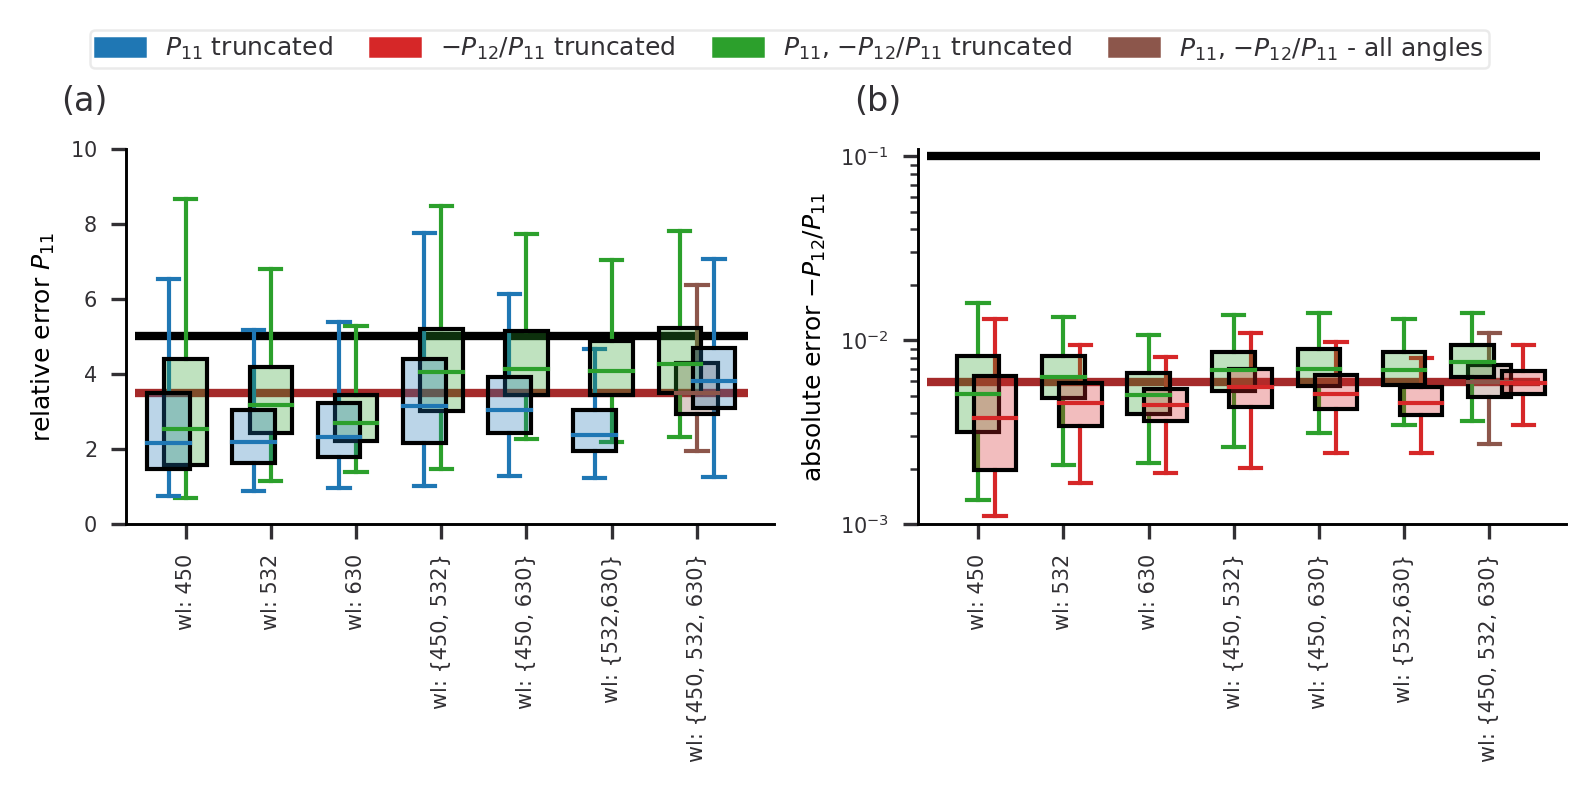

In [25]:
fig = plt.figure(figsize=(5.3,2.5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
k = 0
bplot1 = ax1.boxplot(df_P11_rel1,showfliers = False,positions = position_k,patch_artist = True)
bplot2 = ax2.boxplot(df_P12,showfliers = False,positions = position_k,patch_artist = True)

for patch, color in zip(bplot1['boxes'],color_k):
    patch.set_facecolor(color)
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
for patch, color in zip(bplot2['boxes'],color_k):
    patch.set_facecolor(color)
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))   
for patch, color in zip(bplot1['whiskers'],color_k2):
    patch.set_color(color)
for patch, color in zip(bplot2['whiskers'],color_k2):
    patch.set_color(color)       
for patch, color in zip(bplot1['caps'],color_k2):
    patch.set_color(color)    
for patch, color in zip(bplot2['caps'],color_k2):
    patch.set_color(color)  
for patch, color in zip(bplot1['medians'],color_k):
    patch.set_color(color)
for patch, color in zip(bplot2['medians'],color_k):
    patch.set_color(color)      
    
    
xlabel = ('wl: 450', 'wl: 532','wl: 630','wl: {450, 532}','wl: {450, 630}','wl: {532,630}', 'wl: {450, 532, 630}')
x_pos = np.arange(len(xlabel))+1
ax1.set_xticks(x_pos)
ax1.set_xticklabels(xlabel, rotation='vertical')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(xlabel, rotation='vertical')
ax1.set_ylabel('relative error $P_{11}$')
ax1.tick_params(axis='both', which='major')
ax2.set_ylabel('absolute error $-P_{12}/P_{11}$')
ax2.tick_params(axis='both', which='major')   


ax1.hlines(5,0.4,7.6, colors='black', linestyles='solid',linewidth = 2)
ax2.hlines(0.1,0.4,7.6, colors='black', linestyles='solid',linewidth = 2)

ax1.hlines(df_P11_rel1['1'].median(),0.4,7.6, colors='brown', linestyles='solid',linewidth = 2)
ax2.hlines(df_P12['1'].median(),0.4,7.6, colors='brown', linestyles='solid',linewidth = 2)
ax2.set_yscale('log')
ax2.set_ylim((10**-3, 0.11))
ax1.text(-0.1, 1.1,'(a)' , transform=ax1.transAxes, size=sizel)
ax2.text(-0.1, 1.1,'(b)' , transform=ax2.transAxes, size=sizel)


fig.tight_layout()

red_patch = mpatches.Patch(color = k_red, label ='$-P_{12}/P_{11}$ truncated')
green_patch = mpatches.Patch(color = k_green,label = '$P_{11}$, $-P_{12}/P_{11}$ truncated')
blue_patch = mpatches.Patch(color = k_blue, label ='$P_{11}$ truncated')
brown_patch = mpatches.Patch(color = k_brown, label ='$P_{11}$, $-P_{12}/P_{11}$ - all angles')

plt.legend(handles = [blue_patch, red_patch, green_patch, brown_patch], fontsize = 6,bbox_to_anchor=(0.9, 1.35),ncol = 4)


fig.savefig(f'{directory1_new}/comparison_abs_error_uni_AAE_fw_labels.jpg',bbox_inches='tight')

In [36]:
directory1_new

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE'

In [26]:

for col in dvar_test.columns:
    RMSE = metrics.mean_squared_error(dvar_test[col],dvar_pred_iv[col],squared = False)
    print(RMSE)


1656.5741422119065
0.022928109017022292
0.007420975446293434
0.0042652717564649915
0.0034212248496582427
0.4055848523008297
0.0028346155112671705


In [27]:
def boxplot_func(bplot,colork,color2):
    for patch, color in zip(bplot['boxes'],colork):
        patch.set_facecolor(color)
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .4))
    for patch, color in zip(bplot['whiskers'],color2):

        patch.set_color(color)
    
    for patch, color in zip(bplot['caps'],color2):
      #  print(color)
        patch.set_color(color)    
  
    for patch, color in zip(bplot['medians'],colork):
        patch.set_color(color)


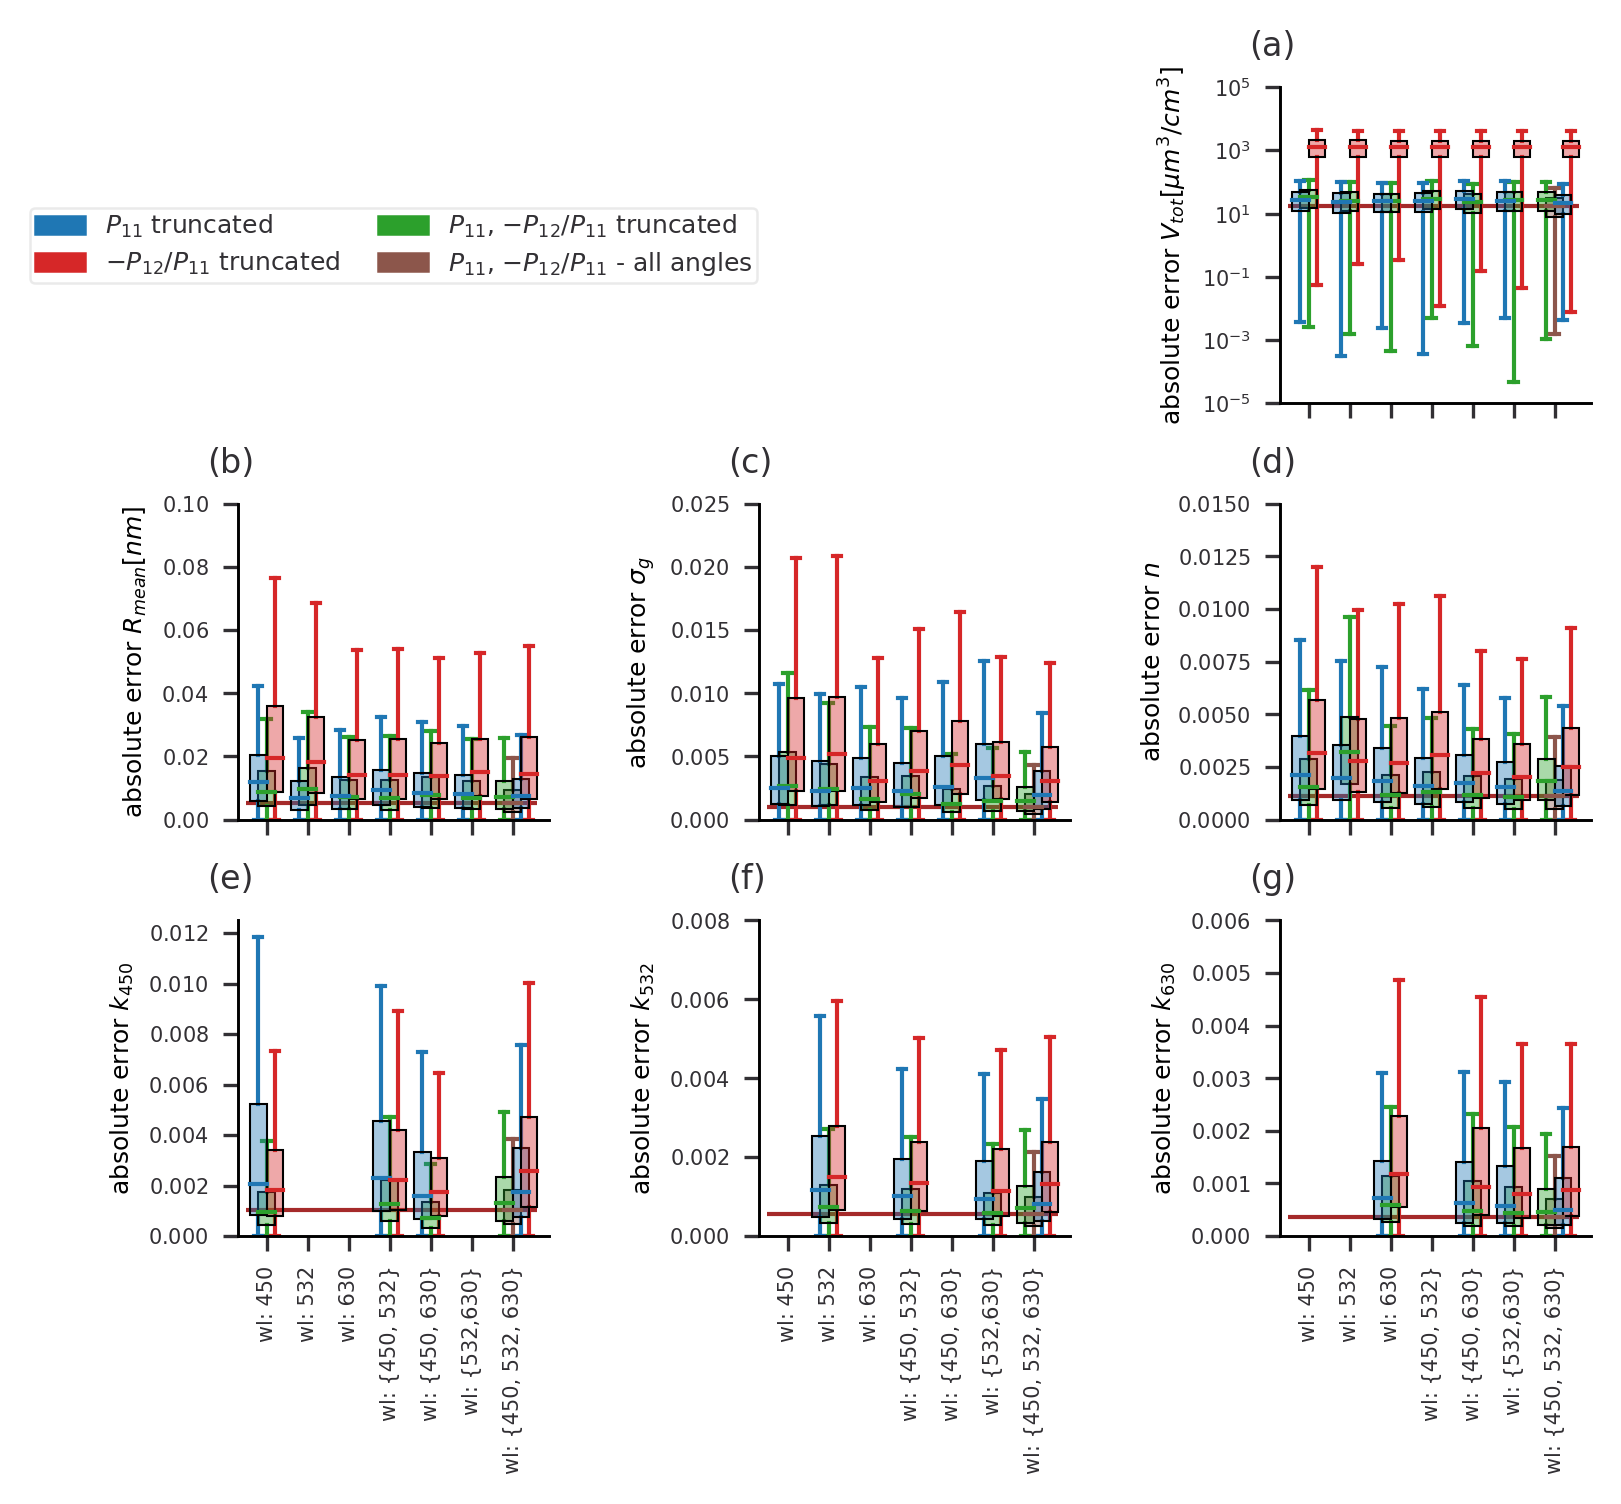

In [28]:
fig = plt.figure(figsize=(5.3,5))
#fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6,sharex=ax3)
ax7 = fig.add_subplot(3,3,7,sharex= ax4)
ax8 = fig.add_subplot(3,3,8,sharex=ax5)
ax9 = fig.add_subplot(3,3,9,sharex=ax3)
boxprops = dict(linestyle='-', linewidth=0.5, color='black')



k = 0
bplot1 = ax3.boxplot(df_Vtot,showfliers = False,positions = position_k,patch_artist = True,widths=(0.4),boxprops = boxprops)
bplot2 = ax4.boxplot(df_Rmedian,showfliers = False,positions = position_k,patch_artist = True,widths=(0.4),boxprops = boxprops)
bplot3 = ax5.boxplot(df_GSD,showfliers = False,positions = position_k,patch_artist = True,widths=(0.4),boxprops = boxprops)
bplot4 = ax6.boxplot(df_n,showfliers = False,positions = position_k,patch_artist = True,widths=(0.4),boxprops = boxprops)
bplot5 = ax7.boxplot(df_k_450,showfliers = False,positions = position_k_450,patch_artist = True,widths=(0.4),boxprops = boxprops)
bplot6 = ax8.boxplot(df_k_532,showfliers = False,positions = position_k_532,patch_artist = True,widths=(0.4),boxprops = boxprops)
bplot7 = ax9.boxplot(df_k_630,showfliers = False,positions = position_k_630,patch_artist = True,widths=(0.4),boxprops = boxprops)


    
boxplot_func(bplot1,color_k,color_k2)
boxplot_func(bplot2,color_k,color_k2)
boxplot_func(bplot3,color_k,color_k2)
boxplot_func(bplot4,color_k,color_k2)
boxplot_func(bplot5,color_k_450,color_k2_450)
boxplot_func(bplot6,color_k_450,color_k2_450)
boxplot_func(bplot7,color_k_450,color_k2_450)


xlabel = ('wl: 450', 'wl: 532','wl: 630','wl: {450, 532}','wl: {450, 630}','wl: {532,630}', 'wl: {450, 532, 630}')
x_pos = np.arange(len(xlabel))+1
#ax1.set_xticks(x_pos)
ax3.set_xticks(x_pos)
ax4.set_xticks(x_pos)
ax5.set_xticks(x_pos)
ax6.set_xticks(x_pos)

ax8.set_xticks(x_pos)
ax8.set_xticklabels(xlabel, rotation='vertical')
ax8.tick_params(axis='both', which='major')

#ax5.set_xticks(x_pos)
#ax5.set_xticklabels(xlabel, rotation='vertical')
#ax5.tick_params(axis='both', which='major')   

ax9.set_xticks(x_pos)
ax9.set_xticklabels(xlabel, rotation='vertical')
ax9.tick_params(axis='both', which='major')

ax7.set_xticks(x_pos)
ax7.set_xticklabels(xlabel, rotation='vertical')
ax7.tick_params(axis='both', which='major')

ax3.set_ylabel('absolute error $V_{tot} [\mu m ^3 / cm^3]$')
ax4.set_ylabel('absolute error $R_{mean} [nm]$')
ax5.set_ylabel('absolute error $\sigma_g$')
ax6.set_ylabel('absolute error $n$')
ax7.set_ylabel('absolute error $k_{450}$')
ax8.set_ylabel('absolute error $k_{532}$')
ax9.set_ylabel('absolute error $k_{630}$')



#plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)
plt.setp(ax6.get_xticklabels(), visible=False)


ax9.set_ylim((0, None))
#ax3.set_ylim((0, None))
ax4.set_ylim((0, None))
ax5.set_ylim((0, None))
ax6.set_ylim((0, None))
ax7.set_ylim((0, None))
ax8.set_ylim((0, None))


ax3.hlines(df_Vtot['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1)
ax4.hlines(df_Rmedian['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1)
ax5.hlines(df_GSD['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1)
ax6.hlines(df_n['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1)
ax7.hlines(df_k_450['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1)
ax8.hlines(df_k_532['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1)
ax9.hlines(df_k_630['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1)

ax3.text(-0.1, 1.1,'(a)' , transform=ax3.transAxes, size=sizel)
ax4.text(-0.1, 1.1,'(b)' , transform=ax4.transAxes, size=sizel)
ax5.text(-0.1, 1.1,'(c)' , transform=ax5.transAxes, size=sizel)
ax6.text(-0.1, 1.1,'(d)' , transform=ax6.transAxes, size=sizel)
ax7.text(-0.1, 1.1,'(e)' , transform=ax7.transAxes, size=sizel)
ax8.text(-0.1, 1.1,'(f)' , transform=ax8.transAxes, size=sizel)
ax9.text(-0.1, 1.1,'(g)' , transform=ax9.transAxes, size=sizel)


ax3.set_yscale('log')

ax1.axis('off')
ax2.axis('off')

red_patch = mpatches.Patch(color = k_red, label ='$-P_{12}/P_{11}$ truncated')
green_patch = mpatches.Patch(color = k_green,label = '$P_{11}$, $-P_{12}/P_{11}$ truncated')
blue_patch = mpatches.Patch(color = k_blue, label ='$P_{11}$ truncated')
brown_patch = mpatches.Patch(color = k_brown, label ='$P_{11}$, $-P_{12}/P_{11}$ - all angles')
ax1.legend(handles = [blue_patch, red_patch, green_patch, brown_patch], fontsize = 6,loc = 'center', ncol = 2)



fig.tight_layout()
fig.savefig(f'{directory1_new}/comparison_abs_error_uni_AAE_iv_labels.jpg',bbox_inches='tight')

In [43]:
directory1_new

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE'